In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [6]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
        
    实现：
        策略需要补充，虽然没有todo，而且返回值应该是01
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i in range(1, num_episodes+1):
        if i % 5000 == 0:
            print("number of episode is: %d/%d" % (i, num_episodes))
        
        episode = []
        state = env.reset()
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            if done == 1:
                break
                
        state_in_episode = set([tuple(elem[0]) for elem in episode])
        for state in state_in_episode:
            first_occurrence = (j for j, x in enumerate(episode) if x[0] == state)
            G = sum([x[2]*(discount_factor**j) for j, x in enumerate(episode[next(first_occurrence):])])
            #使用公式，同时注意迭代器要用next，而不能用加。
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state]/returns_count[state]
            
    return V    

In [7]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    为什么solutionsh
    debug了好久才发现这个也要补
    """
    score, dealer_score, usable_ace = observation
    return 0 if score > 19 else 1

number of episode is: 5000/10000
number of episode is: 10000/10000


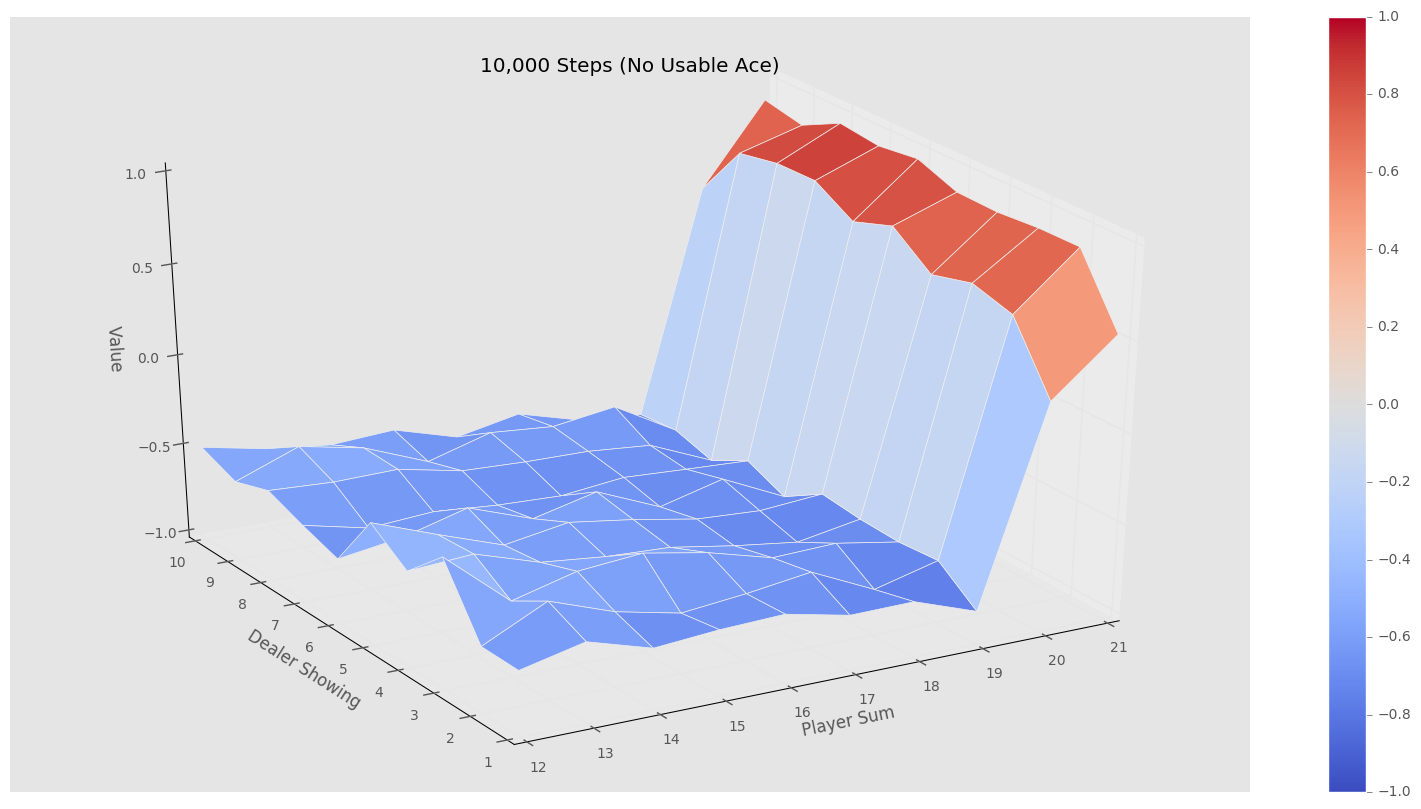

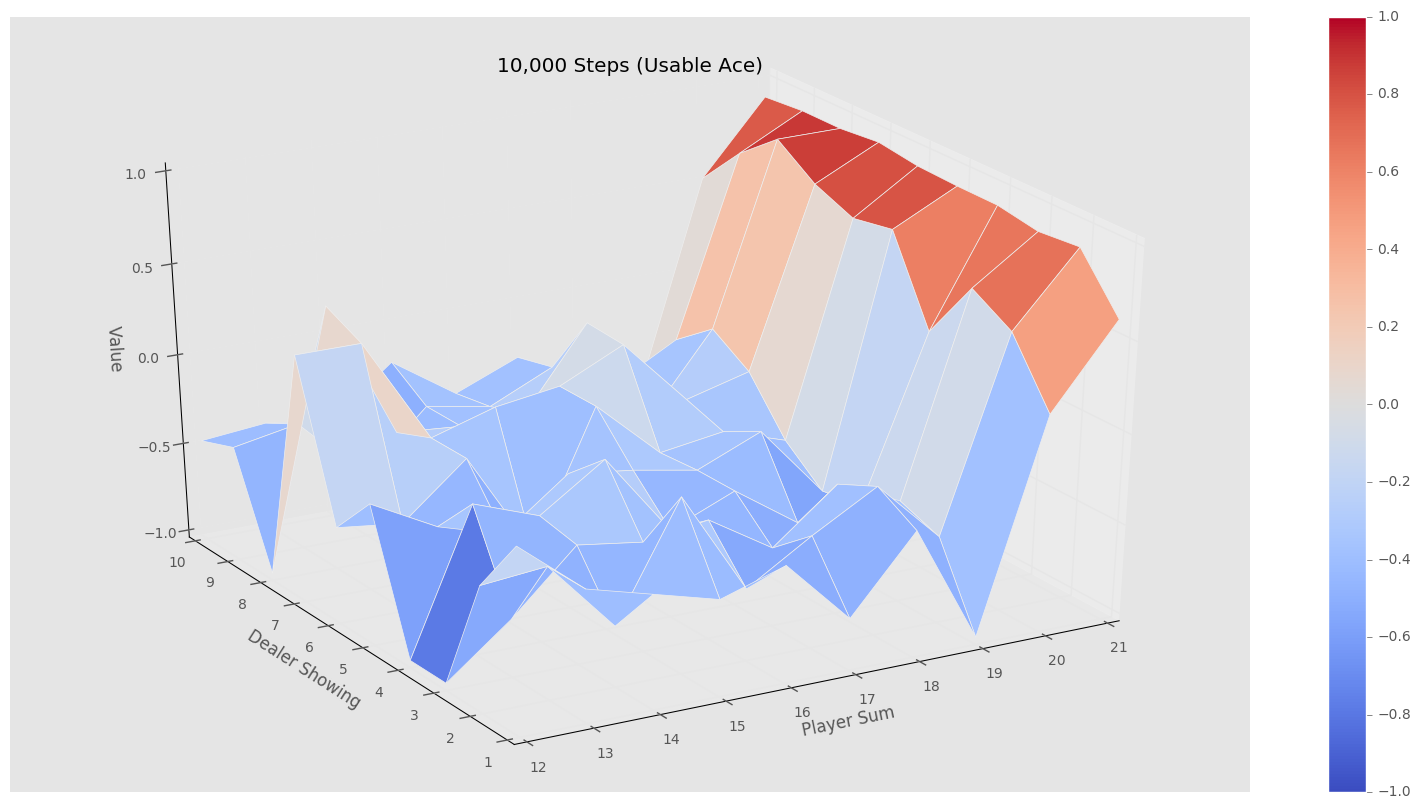

number of episode is: 5000/500000
number of episode is: 10000/500000
number of episode is: 15000/500000
number of episode is: 20000/500000
number of episode is: 25000/500000
number of episode is: 30000/500000
number of episode is: 35000/500000
number of episode is: 40000/500000
number of episode is: 45000/500000
number of episode is: 50000/500000
number of episode is: 55000/500000
number of episode is: 60000/500000
number of episode is: 65000/500000
number of episode is: 70000/500000
number of episode is: 75000/500000
number of episode is: 80000/500000
number of episode is: 85000/500000
number of episode is: 90000/500000
number of episode is: 95000/500000
number of episode is: 100000/500000
number of episode is: 105000/500000
number of episode is: 110000/500000
number of episode is: 115000/500000
number of episode is: 120000/500000
number of episode is: 125000/500000
number of episode is: 130000/500000
number of episode is: 135000/500000
number of episode is: 140000/500000
number of ep

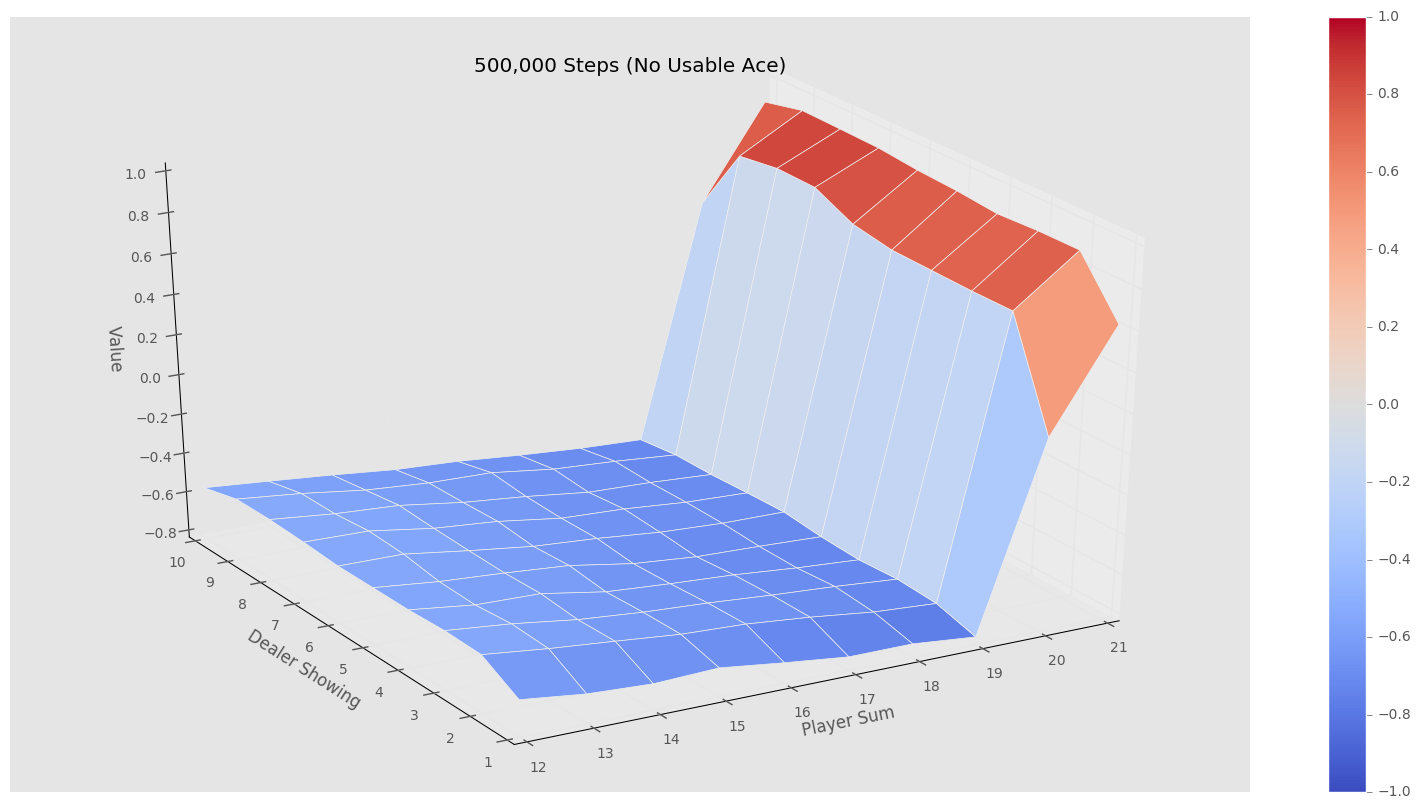

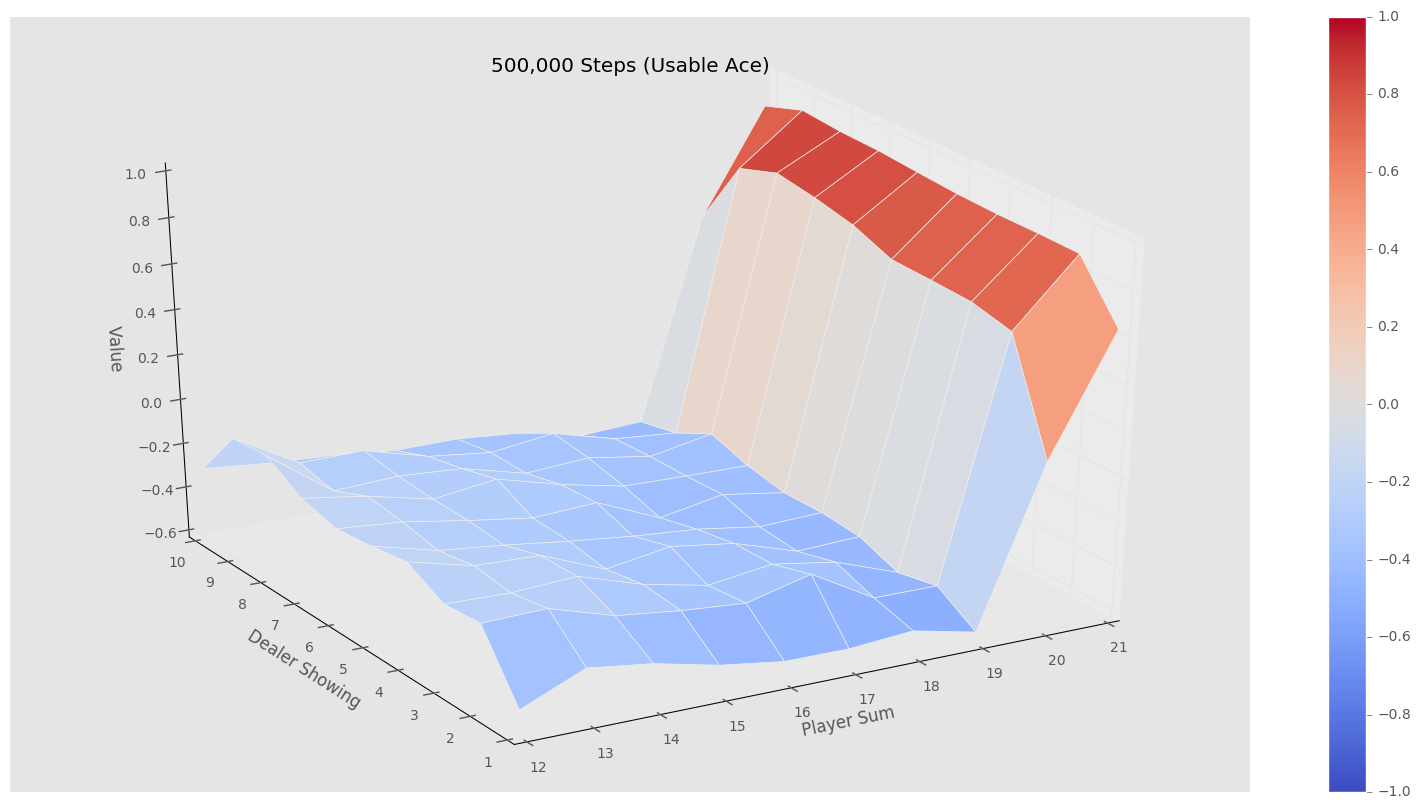

In [8]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")